In [1]:
import pystac
import matplotlib.pyplot as plt 
from mccn.extent import GeoBoxBuilder
from mccn._types import CubeConfig, FilterConfig, ProcessConfig
from mccn.loader.raster import RasterLoadConfig, RasterLoader
from mccn.parser import parse_item, band_filter

In [2]:
rea_collection = pystac.Collection.from_file(
    "tests/files/unit_tests/raster/realestate/stac/collection.json"
)
bands=["red", "blue"]
items=[parse_item(item) for item in rea_collection.get_items(recursive=True)]
pitems = [] 
for item in items: 
    if (pitem:=band_filter(item, bands)): 
        pitems.append(pitem)

rea_loader = RasterLoader(
    pitems,
    filter_config=FilterConfig(GeoBoxBuilder.from_collection(rea_collection, 1000), bands=bands),
)
rea_ds = rea_loader.load()
rea_ds

<xarray.Dataset> Size: 8MB
Dimensions:      (lat: 1000, lon: 1000, time: 1)
Coordinates:
  * lat          (lat) float64 8kB -37.54 -37.54 -37.54 ... -38.0 -38.0 -38.0
  * lon          (lon) float64 8kB 144.4 144.4 144.4 144.4 ... 145.0 145.0 145.0
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 8B 2024-12-31T14:20:00
Data variables:
    blue         (time, lat, lon) float32 4MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    red          (time, lat, lon) float32 4MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

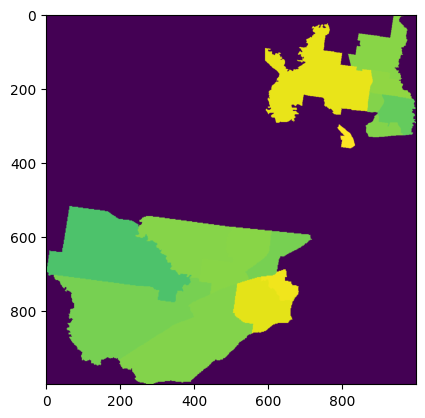

In [3]:
plt.imshow(rea_ds.red[0,:,:])

In [4]:
import pandas as pd 

df = pd.DataFrame([{"A": [1,2], "B": [2,3]}])

In [5]:
df

,A,B
0,"[1, 2]","[2, 3]"


In [6]:
df.rename(columns={"A": "a", "D": "c"})

,a,B
0,"[1, 2]","[2, 3]"
